In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

# Exercise 7: Support Vector Machine (SVM) 
Perform classification for the entire MNIST dataset by using SVMs, e.g. functions in Scikit-learn or Matlab. 


## Load data training and testing data

In [2]:
# Like exercise 6
def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

file = "mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

## Create and fit SVM on training data

In [5]:
# Use sklearn

clf = svm.SVC()

clf.fit(train_set, train_targets)

SVC()

## Test model on test set

In [7]:
# What is the accuracy on the test set?

from sklearn.metrics import accuracy_score


test_predictions = clf.predict(test_set)

accuracy = accuracy_score(test_predictions, test_targets)

print("The accuracy is: ", accuracy)

The accuracy is:  0.9792


## Plot Confusion matrix

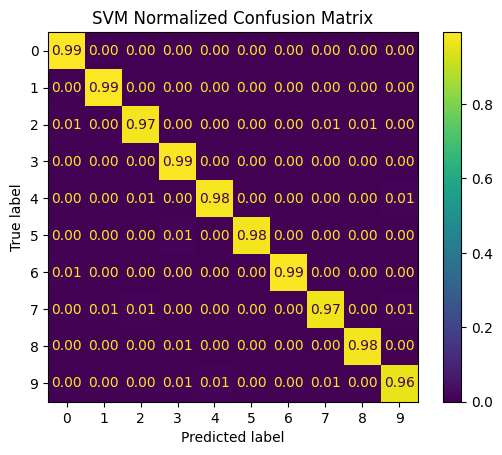

In [16]:
# Does the confusion matrix show us any insights about the model perfromance?

cm = confusion_matrix(test_targets, test_predictions, normalize='true')
display = ConfusionMatrixDisplay(cm)
display.plot(values_format = '.2f')
plt.title('SVM Normalized Confusion Matrix')
plt.show()

## Comparing with PCA/LDA


In [ ]:
# How does SVM compare to PCA and LDA (compare confusion matrices)